In [2]:
#Importing libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Data loading
data = pd.read_csv("..//raw_data//diabetes.csv")

In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### A) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison

In [18]:
# setting seed for reproducibility
np.random.seed(42)

# taking a random sample of 25 observations
sample = data.sample(n=25)

In [19]:
# Calculating mean and highest Glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Calculating population mean and highest Glucose values
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

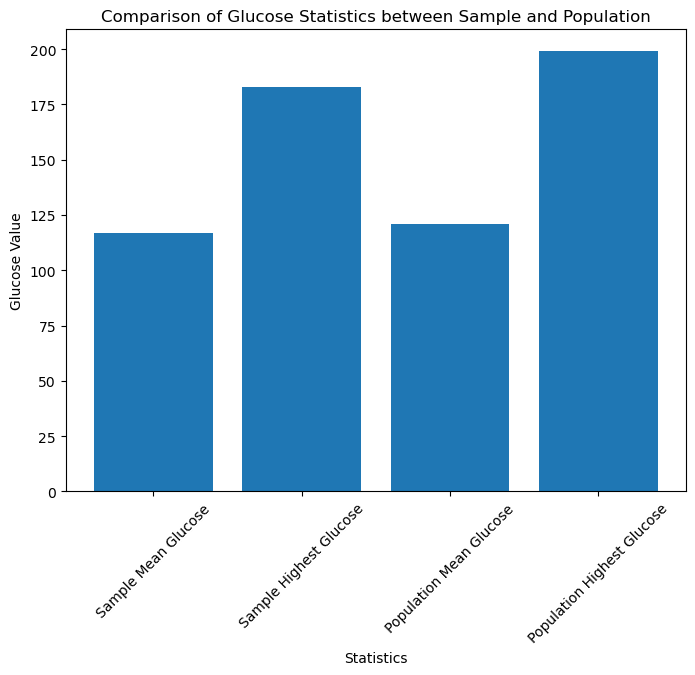

In [22]:
# plotting comparison of mean and highest Glucose values
plt.figure(figsize=(8, 6))
plt.bar(['Sample Mean Glucose', 'Sample Highest Glucose', 'Population Mean Glucose', 'Population Highest Glucose'],
        [sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose])
plt.xlabel('Statistics')
plt.ylabel('Glucose Value')
plt.title('Comparison of Glucose Statistics between Sample and Population')
plt.xticks(rotation=45)
plt.show()

#### B) Find the 98th percentile of BMI of your sample and the population and compare the results
#### using charts

In [30]:
# finding the 98th percentile of BMI for the sample and the population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)
print(sample_98th_percentile_bmi)
print(population_98th_percentile_bmi)

40.248
47.52599999999996


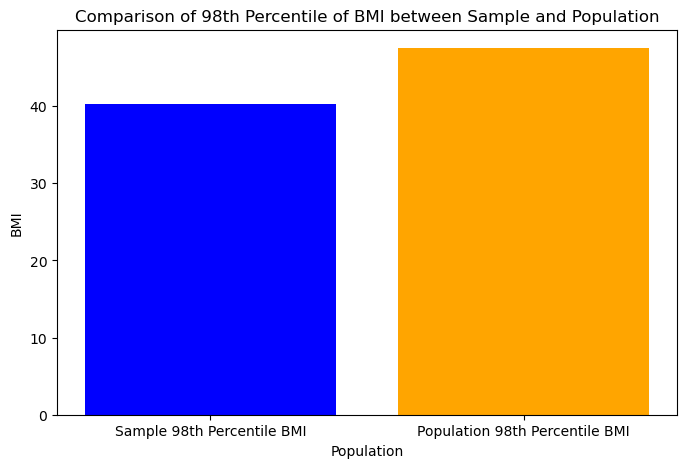

In [24]:
# plotting the comparison of 98th percentile of BMI
plt.figure(figsize=(8, 5))
plt.bar(['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
        [sample_98th_percentile_bmi, population_98th_percentile_bmi], color=['blue', 'orange'])
plt.xlabel('Population')
plt.ylabel('BMI')
plt.title('Comparison of 98th Percentile of BMI between Sample and Population')
plt.show()

#### C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average  mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings

In [25]:
# function to calculate statistics for each bootstrap sample
def calculate_statistics(sample):
    mean_bp = sample['BloodPressure'].mean()
    std_bp = sample['BloodPressure'].std()
    percentile_98_bp = np.percentile(sample['BloodPressure'], 98)
    return mean_bp, std_bp, percentile_98_bp

In [31]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles_98 = []

#performing bootstrap resampling
for _ in range(500):
    bootstrap_sample = diabetes_data.sample(n=150, replace=True)
    mean_bp, std_bp, percentile_98_bp = calculate_statistics(bootstrap_sample)
    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles_98.append(percentile_98_bp)

# calculating population statistics for bloodPressure
population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_bp = diabetes_data['BloodPressure'].std()
population_percentile_98_bp = np.percentile(diabetes_data['BloodPressure'], 98)
print(population_mean_bp)
print(population_std_bp)
print(population_percentile_98_bp)

69.10546875
19.355807170644777
99.31999999999994


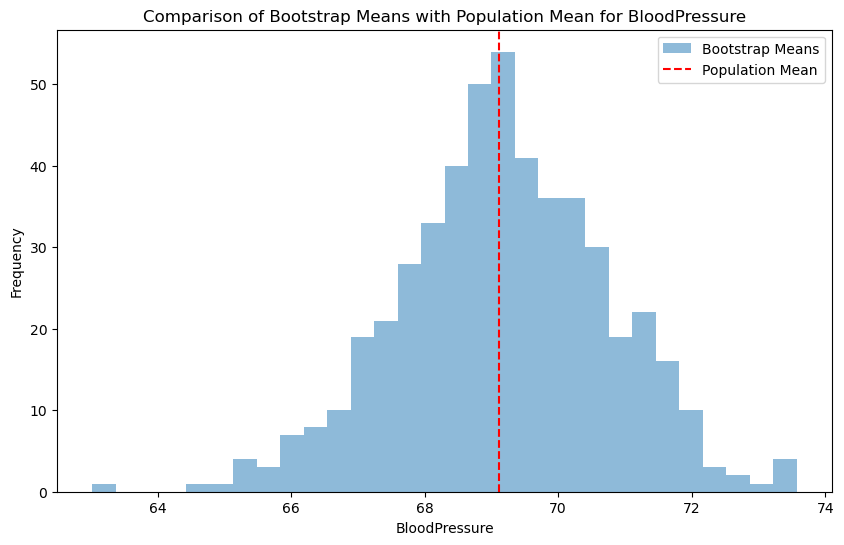

In [27]:
# Plotting comparison of bootstrap and population statistics for BloodPressure
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, alpha=0.5, label='Bootstrap Means')
plt.axvline(x=population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Bootstrap Means with Population Mean for BloodPressure')
plt.legend()
plt.show()

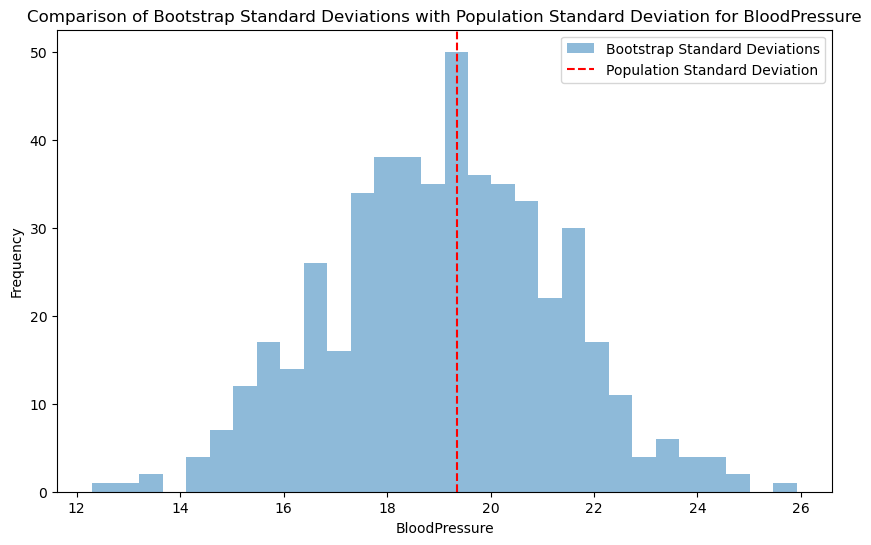

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_stds, bins=30, alpha=0.5, label='Bootstrap Standard Deviations')
plt.axvline(x=population_std_bp, color='red', linestyle='--', label='Population Standard Deviation')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Bootstrap Standard Deviations with Population Standard Deviation for BloodPressure')
plt.legend()
plt.show()

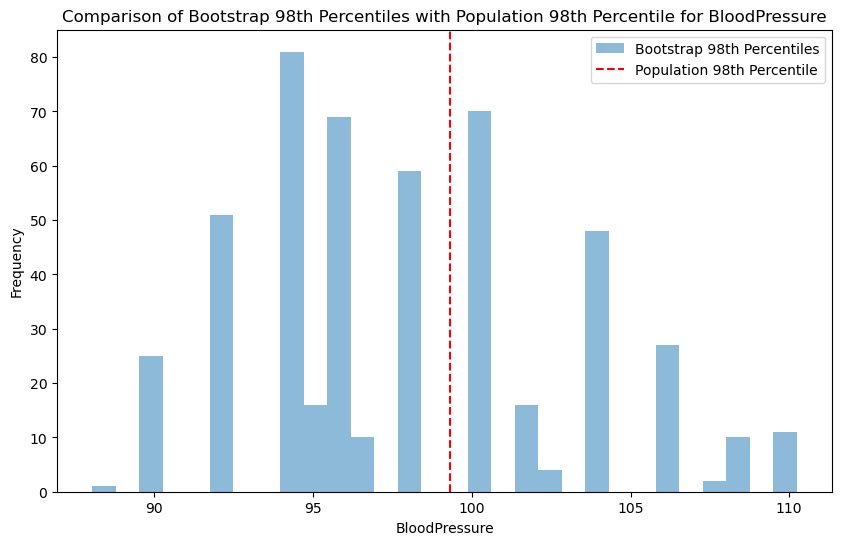

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_percentiles_98, bins=30, alpha=0.5, label='Bootstrap 98th Percentiles')
plt.axvline(x=population_percentile_98_bp, color='red', linestyle='--', label='Population 98th Percentile')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Bootstrap 98th Percentiles with Population 98th Percentile for BloodPressure')
plt.legend()
plt.show()